# HW3 for Statistics with Meteorological Application
---
Student: 林之然 (B11209005, 大氣二), 蔡知諺（B11209014, 大氣二）

## 3.1

### Abstract
In the following code and discussion, we utilized the TS (Surface Temperature) data from Homework 1 to further explore the relationship between its Standard Deviation and distribution. Furthermore, we did a detailed observation to the distribution graph and tried to make it an exhaustive discussion. 

### Import and open file

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import norm
# Path
file_path = "../hw1/TS Statistics Meteor.txt"

# Load the data
data = pd.read_csv(file_path, header=None, names=['Value'])
data['Time'] = pd.date_range(start='2020-01-01', periods=len(data), freq='M')
data.set_index('Time', inplace=True)

### Calculate std. of raw data

In [19]:
# Now, we will calculate the mean, standard deviation, and the requested mean +- std values.
mean_temp = data['Value'].mean()
std_temp = data['Value'].std()

# Calculate mean ± std, mean ± 2*std, and mean ± 3*std
mean_plus_minus_std = [(mean_temp + i * std_temp, mean_temp - i * std_temp) for i in range(1, 4)]

# Calculate the percentage of months within each range
percentages = [(np.sum((data['Value'] <= upper) & (data['Value'] >= lower)) / len(data['Value'])) * 100
                for upper, lower in mean_plus_minus_std]

print(f"The Mean Tamperature is {mean_temp: 5.2f}, The Standard Deviation is {std_temp: 5.2f}")
for i, (range_values, percentage) in enumerate(zip(mean_plus_minus_std, percentages)):
    result_text = f"For Mean ± {i+1}*std, the range is from {range_values[1]:5.2f}°C to {range_values[0]:5.2f}°C. "
    result_text += f"About {percentage:5.1f}% of the months fall within this range."
    print(result_text)

The Mean Tamperature is  11.46, The Standard Deviation is  4.62
For Mean ± 1*std, the range is from  6.84°C to 16.08°C. About  50.2% of the months fall within this range.
For Mean ± 2*std, the range is from  2.21°C to 20.71°C. About 100.0% of the months fall within this range.
For Mean ± 3*std, the range is from -2.41°C to 25.33°C. About 100.0% of the months fall within this range.


#### Visualize

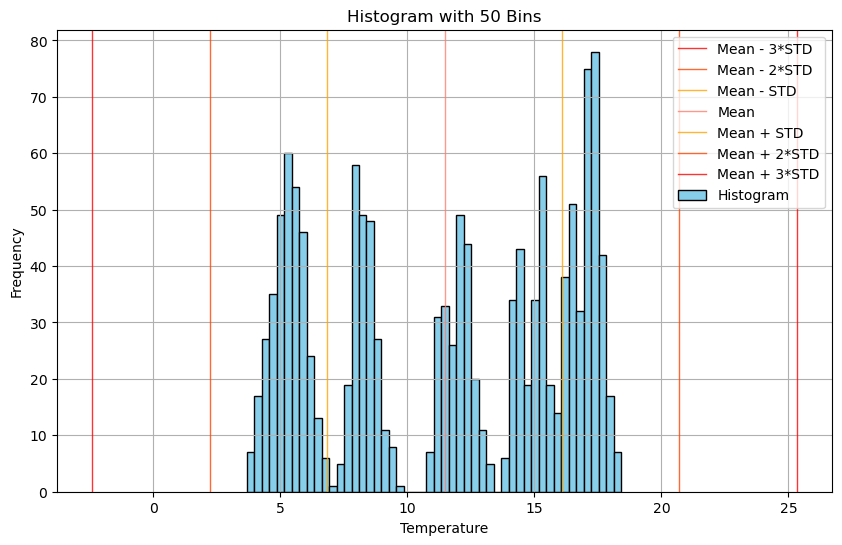

In [20]:
# Plotting histograms with different bin sizes for the original data
bins = 50

plt.figure(figsize=(10, 6))
plt.hist(data['Value'], bins=bins, color='skyblue', edgecolor='black')
plt.title(f'Histogram with {bins} Bins')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Adding lines for the mean and mean ± 1*std, mean ± 2*std, and mean ± 3*std
std_ranges = [mean_temp + i * std_temp for i in range(-3, 4)]
colors = ['red', 'orangered', 'orange', 'salmon', 'orange', 'orangered', 'red']

for std_range, color in zip(std_ranges, colors):
    plt.axvline(std_range, color=color, linewidth=1, alpha=0.8)

# Adding legends for the lines
plt.legend(['Mean - 3*STD', 'Mean - 2*STD', 'Mean - STD', 'Mean', 
            'Mean + STD', 'Mean + 2*STD', 'Mean + 3*STD', 'Histogram'], loc='upper right')
plt.grid()
plt.show()

### Calculate std. of deseasonalized data

In [23]:
# Decomposition with a monthly period for surface temperature data
decomposition_result_monthly = seasonal_decompose(data['Value'], model='additive', period=12)
data['Deseasonalized'] = data['Value'] - decomposition_result_monthly.seasonal - data['Value'].mean()

# Calculate the mean, standard deviation, and the requested mean +- std values.
mean_temp_de = data['Deseasonalized'].mean()
std_temp_de = data['Deseasonalized'].std()

# Calculate mean ± std, mean ± 2*std, and mean ± 3*std
mean_plus_minus_std_de = [(mean_temp_de + i * std_temp_de, mean_temp_de - i * std_temp_de) for i in range(1, 4)]

# Calculate the percentage of months within each range
percentages_de = [(np.sum((data['Deseasonalized'] <= upper) & (data['Deseasonalized'] >= lower)) / len(data['Deseasonalized'])) * 100
                for upper, lower in mean_plus_minus_std_de]

print(f"The Mean Tamperature is {mean_temp_de: 5.2f}, The Standard Deviation is {std_temp_de: 5.2f}")

for i, (range_values_de, percentage_de) in enumerate(zip(mean_plus_minus_std_de, percentages_de)):
    result_text_de = f"For Mean ± {i+1}*std, the range is from {range_values_de[1]:5.2f}°C to {range_values_de[0]:5.2f}°C. "
    result_text_de += f"About {percentage_de:5.1f}% of the months fall within this range."
    print(result_text_de)

The Mean Tamperature is -0.00, The Standard Deviation is  0.39
For Mean ± 1*std, the range is from -0.39°C to  0.39°C. About  70.9% of the months fall within this range.
For Mean ± 2*std, the range is from -0.78°C to  0.78°C. About  94.7% of the months fall within this range.
For Mean ± 3*std, the range is from -1.17°C to  1.17°C. About  99.5% of the months fall within this range.


#### Visualize

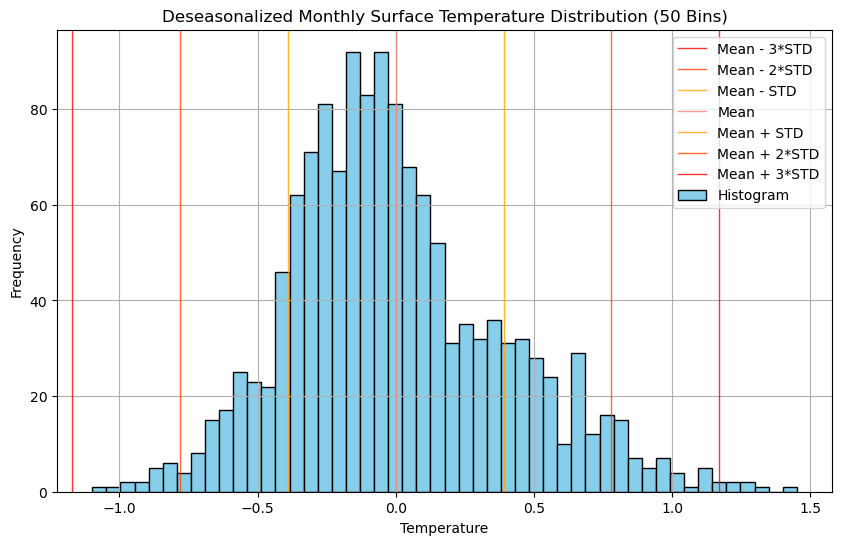

In [22]:
# Plotting the deseasonalized data histogram with the original bin size
plt.figure(figsize=(10, 6))
plt.hist(data['Deseasonalized'], bins=50, color='skyblue', edgecolor='black')
plt.title('Deseasonalized Monthly Surface Temperature Distribution (50 Bins)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Adding lines for the mean and mean ± 1*std, mean ± 2*std, and mean ± 3*std
std_ranges = [mean_temp_de + i * std_temp_de for i in range(-3, 4)]
colors = ['red', 'orangered', 'orange', 'salmon', 'orange', 'orangered', 'red']

for std_range, color in zip(std_ranges, colors):
    plt.axvline(std_range, color=color, linewidth=1, alpha = 0.8)

# Adding legends for the lines
plt.legend(['Mean - 3*STD', 'Mean - 2*STD', 'Mean - STD', 'Mean', 
            'Mean + STD', 'Mean + 2*STD', 'Mean + 3*STD', 'Histogram'])
plt.grid()
plt.show()



### Discussion


- 第一張圖：因為標準差太大的關係，所有資料都在 2std 之內，所以很難討論出什麼

- 接近常態分佈，解釋為 internal variability: 長時間平均下來是 0
- 右偏：左端在 3std 之內，右邊尾巴比較長
    - 一百年當中近十年的溫度有急遽升溫，因此右方的極端值或許是代表著近十年（假設為一個常態分佈）的右邊尾巴


## 3.2 Ask ChatGPT
P.S. The following article is generated by GPTs-Consensus.

### 1. 樣本平均分配？

樣本平均的分配，或稱為樣本平均的抽樣分布，是一個統計學中的核心概念，指的是如果從同一個母體中反覆隨機抽取大量相同大小的樣本，然後計算每個樣本的平均值，這些平均值的分布形態。這個分布闡明了樣本平均值如何圍繞著母體平均值分布，並且當樣本大小增加時，這些平均值會越來越集中於母體平均值附近。

- 依據Aguinis和Branstetter (2007)的研究，抽樣分布的概念是推論統計中最重要的概念之一，透過結合認知負荷、連續性和經驗學習理論，可以有效地教學此概念，從而增強學生對此概念的理解和學習成效【[Aguinis & Branstetter, 2007](https://consensus.app/papers/teaching-concept-sampling-distribution-mean-aguinis/870f6b4cd95e500d8c336c25bf4a9d96/?utm_source=chatgpt)】。
- Ross (2021)提到，中央極限定理是一個重要的理論結果，它說明了為何大樣本情況下樣本平均的分布近似正態分布，即使母體分布本身並非正態分布【[Ross, 2021](https://consensus.app/papers/distributions-sampling-statistics-ross/7a7e853922f454f99fe7ea344d5a650c/?utm_source=chatgpt)】。

綜上所述，樣本平均的分配揭示了樣本平均值圍繞母體平均值的分布方式，而中央極限定理進一步解釋了在大樣本情況下樣本平均值的分布特性。

### 2. 「標準誤」是什麼以及這個資訊的用處為何？

「標準誤」(Standard Error, SE)是衡量統計資料中樣本平均值的估計精確度的一種指標。它是樣本平均值的標準差，用於表示當從同一母體中抽取多個樣本時，樣本平均值的分布情況。簡而言之，標準誤反映了樣本平均值作為母體平均值估計的可靠程度。

標準誤的用處主要包括：

1. **估計母體平均值的精確度**：標準誤可以幫助我們了解樣本統計量（如平均值）作為母體參數估計的準確性，其中較小的標準誤表示較高的估計精確度【[Dudek, 1979](https://consensus.app/papers/continuing-misinterpretation-standard-error-dudek/c2edcd9f08395564b86afc9dbc70709e/?utm_source=chatgpt)】。

2. **建立信賴區間**：標準誤是計算信賴區間的關鍵成分，通過樣本平均值的標準誤，我們可以估計母體平均值在特定信賴水平下的可能範圍。這在科學研究中尤為重要，因為它提供了對估計的不確定性的量化【[Altman & Bland, 2005](https://consensus.app/papers/standard-deviations-errors-altman/d7d8fa959e61544b869b2918feec4d62/?utm_source=chatgpt)】。

3. **評估統計顯著性**：在進行假設檢定時，標準誤用於計算統計量（如t統計量），進一步判斷觀察到的效果是否具有統計顯著性。這有助於研究人員決定結果是否不太可能僅由於隨機變異而產生【[Lee, In, & Lee, 2015](https://consensus.app/papers/standard-deviation-standard-error-mean-lee/045aa0c875465a81aaaffe17119348d9/?utm_source=chatgpt)】。

總之，標準誤是衡量統計估計準確度的一個重要指標，它在數據分析、科學研究和決策制定中發揮著關鍵作用。通过理解和正確使用標準誤，研究人員和分析師可以更有效地解釋他們的研究結果並做出更有信息量的結論。